In [1]:
# Tematem naszego projektu jest emigracja ludności, czyli wyjazd za granicę państwa na określony czas lub 
# w celu zamieszkania tam na stałe. Zjawisko z każdym kolejnym rokiem, jest coraz bardziej odczuwalne dla naszego 
# Państwa, jednak warto przyjrzeć się też chociażby naszym sąsiadom. 

In [2]:
# Zaimportujmy kilka bibliotek, dzięki, którym możliwe będzie przedstawienie wyników badań. 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import csv

In [3]:
# Przygotujmy klasę odpowiedzlaną za podstawowe operacje na plikach co ułatwi naszą pracę oraz dzięki czemu kod stanie się bardziej przejrzysty.
class Analysis:
    file_name = ''
    def __init__(self, file_name):
        self.file_name = file_name
    
    def read(self, skip_rows):
        df=pd.read_excel(self.file_name, skiprows=skip_rows)
        return df

In [4]:
# Poniżej prezentujemy wyniki badań z serwisu eurostat, dotyczące emigracji w przeciągu lat, w określonych miejscach.
df=Analysis('migr_emi2.xls')
df=df.read(11)
df

,GEO/TIME,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Belgium,66013,84148,93600,102657,94573,89794,92471,89690,88935,102936
1,Bulgaria,:,:,16615,19678,28727,29470,30570,31586,33225,39941
2,Czechia,61069,55910,46106,25894,28468,25684,38864,27316,26742,77798
3,Denmark,41456,41593,43663,43310,44426,44625,52654,56403,60381,66520
4,Germany (until 1990 former territory of the FRG),252456,249045,240001,259328,324221,338403,533762,560700,540415,576319
5,Estonia,5294,6214,6321,6740,4637,13003,13792,12358,10476,12801
6,Ireland,78099,83049,81797,76560,71107,67160,62056,64068,53735,62004
7,Greece,62041,92404,124694,117094,106804,109351,106535,103327,103049,95020
8,Spain,403377,409034,446606,532303,400430,343875,327325,368860,309526,296248
9,France,269531,291594,255922,239813,308103,324517,313622,215470,300668,299101


In [5]:
# Treść pliku nie prezentuje się w sposób nas satysfakcjonujący. 
# W pierwszej kolejności zmienimy pierwszą komórkę, następnie przytnieny więc końcówkę statystyki, 
# z miejscami, w których dane nie zostały pobrane/ujawnione. 
df = df.rename(columns={'GEO/TIME':'LOKALIZACJA / ROK'})
df=df.iloc[:33]
df

,LOKALIZACJA / ROK,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Belgium,66013,84148,93600,102657,94573,89794,92471,89690,88935,102936
1,Bulgaria,:,:,16615,19678,28727,29470,30570,31586,33225,39941
2,Czechia,61069,55910,46106,25894,28468,25684,38864,27316,26742,77798
3,Denmark,41456,41593,43663,43310,44426,44625,52654,56403,60381,66520
4,Germany (until 1990 former territory of the FRG),252456,249045,240001,259328,324221,338403,533762,560700,540415,576319
5,Estonia,5294,6214,6321,6740,4637,13003,13792,12358,10476,12801
6,Ireland,78099,83049,81797,76560,71107,67160,62056,64068,53735,62004
7,Greece,62041,92404,124694,117094,106804,109351,106535,103327,103049,95020
8,Spain,403377,409034,446606,532303,400430,343875,327325,368860,309526,296248
9,France,269531,291594,255922,239813,308103,324517,313622,215470,300668,299101


In [6]:
# Dla przejrzystości danych i poprawnej dalszej analizy zmieńmy nazwę komórki Niemiec
df = df.replace(['Germany (until 1990 former territory of the FRG)'], 'Germany')
df

,LOKALIZACJA / ROK,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Belgium,66013,84148,93600,102657,94573,89794,92471,89690,88935,102936
1,Bulgaria,:,:,16615,19678,28727,29470,30570,31586,33225,39941
2,Czechia,61069,55910,46106,25894,28468,25684,38864,27316,26742,77798
3,Denmark,41456,41593,43663,43310,44426,44625,52654,56403,60381,66520
4,Germany,252456,249045,240001,259328,324221,338403,533762,560700,540415,576319
5,Estonia,5294,6214,6321,6740,4637,13003,13792,12358,10476,12801
6,Ireland,78099,83049,81797,76560,71107,67160,62056,64068,53735,62004
7,Greece,62041,92404,124694,117094,106804,109351,106535,103327,103049,95020
8,Spain,403377,409034,446606,532303,400430,343875,327325,368860,309526,296248
9,France,269531,291594,255922,239813,308103,324517,313622,215470,300668,299101


In [7]:
# Jak widać w zestawieniu są obecne 33 pozycje. Do porównania daleko szukać nie trzeba, 
# dlatego też poniżej prezentujemy okrojone (dostępne) dane tzn. Polska i kraje sąsiednie.
df2= df[df['LOKALIZACJA / ROK'] == 'Poland' ]
sasiedzi = ['Germany', 'Czechia', 'Slovakia', 'Ukraine', 'Belarus', 'Lithuania', 'Russia']
for sasiad in sasiedzi:
    df2 = df2.append(df[df['LOKALIZACJA / ROK'] == sasiad])
    if (~(df2['LOKALIZACJA / ROK'].eq(sasiad).any())):
        print("brak " + sasiad + " w zestawieniu")
df2

brak Ukraine w zestawieniu
brak Belarus w zestawieniu
brak Russia w zestawieniu


,LOKALIZACJA / ROK,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
20,Poland,218126,265798,275603,276446,268299,258837,236441,218492,189794,180594
4,Germany,252456,249045,240001,259328,324221,338403,533762,560700,540415,576319
2,Czechia,61069,55910,46106,25894,28468,25684,38864,27316,26742,77798
24,Slovakia,1889,1863,2003,2770,3644,3870,3801,3466,3298,3384
14,Lithuania,83157,53863,41100,38818,36621,44533,50333,47925,32206,29273


In [8]:
# Aby tabela wyglądała estetyczniej, zastąpimy obecne indeksy, numerami w kolejności, zaczynając od 0
df2.reset_index(drop=True, inplace=True)
df2

,LOKALIZACJA / ROK,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Poland,218126,265798,275603,276446,268299,258837,236441,218492,189794,180594
1,Germany,252456,249045,240001,259328,324221,338403,533762,560700,540415,576319
2,Czechia,61069,55910,46106,25894,28468,25684,38864,27316,26742,77798
3,Slovakia,1889,1863,2003,2770,3644,3870,3801,3466,3298,3384
4,Lithuania,83157,53863,41100,38818,36621,44533,50333,47925,32206,29273


In [9]:
# Niestety nie wszystkie państwa zostały zawarte w ogólnym porównaniu, jednak sprawdźmy jak wypadamy na tle
# uzyskanych danych. Porównajmy sobie maksymalne wyniki (z tabeli Polska i dostępni sąsiedzi).
lata = df2.columns.values.tolist()
lata.pop(0)

df3=df2.rename(columns={'LOKALIZACJA / ROK':'LOKALIZACJA'})
df3.reset_index(drop=True, inplace=True)
df3 = df3.set_index(['LOKALIZACJA'])

for rok in lata:
    print(rok, [df3[rok].astype(float).idxmax()], df3[rok].to_numpy().max())


2010 ['Germany'] 252456
2011 ['Poland'] 265798
2012 ['Poland'] 275603
2013 ['Poland'] 276446
2014 ['Germany'] 324221
2015 ['Germany'] 338403
2016 ['Germany'] 533762
2017 ['Germany'] 560700
2018 ['Germany'] 540415
2019 ['Germany'] 576319


In [10]:
# Jak widać w naszym porównaniu przodują Niemcy, jednak Polska momentami przebijała ten wynik. Sprawdźmy więc jak wyniki kształtowały się u nas. Aby wynik był bardziej przejrzysty, oraz aby zaprezentować jak rozkładało się to na przestrzeni lat, poniżej wyświetlimy wykres. Zacznijmy zatem od przygotowania danych.
df9 = df[df['LOKALIZACJA / ROK'] == 'Poland']
df9=df9.rename(columns={'LOKALIZACJA / ROK':'ROK'})
df9.reset_index(drop=True, inplace=True)
df9 = df9.set_index(['ROK'])
df9 = df9.T
df9['Poland']=df9['Poland'].astype(float)
df9.dtypes
df9


ROK,Poland
2010,218126.0
2011,265798.0
2012,275603.0
2013,276446.0
2014,268299.0
2015,258837.0
2016,236441.0
2017,218492.0
2018,189794.0
2019,180594.0


<Figure size 432x288 with 0 Axes>

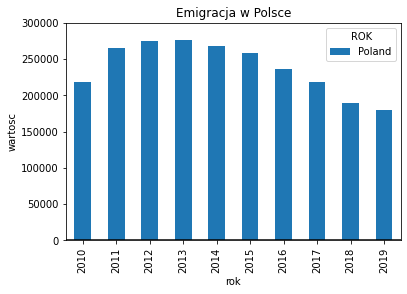

In [11]:
# Przygotujmy wykres z naszych danych, zapiszmy go do PDF'a
plt.figure()
df9.plot.bar()
plt.axhline(0, color="k")
plt.ylabel('wartosc')
plt.xlabel('rok')
plt.title('Emigracja w Polsce')
plt.ylim([0, 300000])
plt.savefig('poland-emigration.pdf')

In [12]:
# Kiedy nastąpiła największa a kiedy najmniejsza migacja? Ile wynosiły? Poniżej prezentujemy odpowiedzi na nurtujące nas pytania.
df_poland_m = df9
print("Największa migracja: \n", df_poland_m.loc[df_poland_m.idxmax()])
print("Najmniejsza migracja: \n", df_poland_m.loc[df_poland_m.idxmin()])

Największa migracja: 
 ROK     Poland
2013  276446.0
Najmniejsza migracja: 
 ROK     Poland
2019  180594.0


In [13]:
# Warto również zastanowić się który kraj jest najmniej opuszczany i, prawdopodobnie dzięki warunkom tam panującym, potrafi zatrzymać swoich obywateli? Poniżej przedstawiamy minimalne wyniki.
df4=df2.rename(columns={'LOKALIZACJA / ROK':'LOKALIZACJA'})
df4.reset_index(drop=True, inplace=True)
df4 = df4.set_index(['LOKALIZACJA'])

for rok in lata:
    print(rok, [df4[rok].astype(float).idxmin()], df4[rok].to_numpy().min())



2010 ['Slovakia'] 1889
2011 ['Slovakia'] 1863
2012 ['Slovakia'] 2003
2013 ['Slovakia'] 2770
2014 ['Slovakia'] 3644
2015 ['Slovakia'] 3870
2016 ['Slovakia'] 3801
2017 ['Slovakia'] 3466
2018 ['Slovakia'] 3298
2019 ['Slovakia'] 3384


In [14]:
# Do dalszej analizy tworzymy pomocniczy DataFrame.
df_helper=df.rename(columns={'LOKALIZACJA / ROK':'ROK'})
df_helper.reset_index(drop=True, inplace=True)
df_helper = df_helper.set_index(['ROK'])
df_helper = df_helper.T
df_helper

ROK,Belgium,Bulgaria,Czechia,Denmark,Germany,Estonia,Ireland,Greece,Spain,France,...,Slovenia,Slovakia,Finland,Sweden,Iceland,Liechtenstein,Norway,Switzerland,United Kingdom,North Macedonia
2010,66013,:,61069,41456,252456,5294,78099,62041,403377,269531,...,15937,1889,11905,48853,5459,428,25835,96839,339306,1007
2011,84148,:,55910,41593,249045,6214,83049,92404,409034,291594,...,12024,1863,12660,51179,4812,467,20349,96494,350703,1290
2012,93600,16615,46106,43663,240001,6321,81797,124694,446606,255922,...,14378,2003,13845,51747,4758,439,22693,103881,321217,1415
2013,102657,19678,25894,43310,259328,6740,76560,117094,532303,239813,...,13384,2770,13893,50715,4372,497,26523,106196,316934,1041
2014,94573,28727,28468,44426,324221,4637,71107,106804,400430,308103,...,14336,3644,15486,51237,4052,476,29308,111103,319086,839
2015,89794,29470,25684,44625,338403,13003,67160,109351,343875,324517,...,14913,3870,16305,55830,4046,468,29173,116631,299183,1016
2016,92471,30570,38864,52654,533762,13792,62056,106535,327325,313622,...,15572,3801,18082,45878,4159,522,34694,120653,340440,630
2017,89690,31586,27316,56403,560700,12358,64068,103327,368860,215470,...,17555,3466,16973,45620,3641,426,31963,124997,359665,424
2018,88935,33225,26742,60381,540415,10476,53735,103049,309526,300668,...,13527,3298,19141,46981,4372,484,27158,130225,344347,377
2019,102936,39941,77798,66520,576319,12801,62004,95020,296248,299101,...,15106,3384,17263,47718,4590,446,23207,126221,368385,:


In [15]:
# Aby sprawnie działać na danych. Ustawmy wartość "NaN" tam gdzie brakuje zawartości.
państwa = df_helper.columns.values.tolist()

for państwo in państwa:
    df_helper[państwo]= df_helper[państwo].replace(':', float('NaN'))

df_helper


ROK,Belgium,Bulgaria,Czechia,Denmark,Germany,Estonia,Ireland,Greece,Spain,France,...,Slovenia,Slovakia,Finland,Sweden,Iceland,Liechtenstein,Norway,Switzerland,United Kingdom,North Macedonia
2010,66013,NaN,61069,41456,252456,5294,78099,62041,403377,269531,...,15937,1889,11905,48853,5459,428,25835,96839,339306,1007.0
2011,84148,NaN,55910,41593,249045,6214,83049,92404,409034,291594,...,12024,1863,12660,51179,4812,467,20349,96494,350703,1290.0
2012,93600,16615.0,46106,43663,240001,6321,81797,124694,446606,255922,...,14378,2003,13845,51747,4758,439,22693,103881,321217,1415.0
2013,102657,19678.0,25894,43310,259328,6740,76560,117094,532303,239813,...,13384,2770,13893,50715,4372,497,26523,106196,316934,1041.0
2014,94573,28727.0,28468,44426,324221,4637,71107,106804,400430,308103,...,14336,3644,15486,51237,4052,476,29308,111103,319086,839.0
2015,89794,29470.0,25684,44625,338403,13003,67160,109351,343875,324517,...,14913,3870,16305,55830,4046,468,29173,116631,299183,1016.0
2016,92471,30570.0,38864,52654,533762,13792,62056,106535,327325,313622,...,15572,3801,18082,45878,4159,522,34694,120653,340440,630.0
2017,89690,31586.0,27316,56403,560700,12358,64068,103327,368860,215470,...,17555,3466,16973,45620,3641,426,31963,124997,359665,424.0
2018,88935,33225.0,26742,60381,540415,10476,53735,103049,309526,300668,...,13527,3298,19141,46981,4372,484,27158,130225,344347,377.0
2019,102936,39941.0,77798,66520,576319,12801,62004,95020,296248,299101,...,15106,3384,17263,47718,4590,446,23207,126221,368385,NaN


In [16]:
# Aby zaspokoić ciekawość sprawdźmy maksymalny wynik z tabeli ogólnej.
country_with_max= df_helper.max().max()
print(df_helper.columns[(df_helper == country_with_max).any()][0], country_with_max)

Germany 576319


In [17]:
# Oraz wynik minimalny.
country_with_min = df_helper.min().min()
print(df_helper.columns[(df_helper == country_with_min).any()][0], country_with_min)

North Macedonia 377.0


In [18]:
# Następnie sprawdżmy dane dotyczące każdego kraju i roku w którym emigracja była największa oraz załączmy je do df_maksim, aby później wyeksporotwać dane do pliku.
columns_name = ['Rok', 'Ilosc']
df_maksim = pd.DataFrame(data = [], columns=columns_name)
kraje = df_helper.columns.values.tolist()
for kraj in kraje:
    print([df_helper[kraj].astype(float).idxmax()], kraj, np.nanmax( df_helper[kraj].to_numpy()))
    df_maksim.loc[kraj] = ([df_helper[kraj].astype(float).idxmax()], np.nanmax( df_helper[kraj].to_numpy()))


['2019'] Belgium 102936
['2019'] Bulgaria 39941.0
['2019'] Czechia 77798
['2019'] Denmark 66520
['2019'] Germany 576319
['2016'] Estonia 13792
['2011'] Ireland 83049
['2012'] Greece 124694
['2013'] Spain 532303
['2015'] France 324517
['2017'] Croatia 47352
['2019'] Italy 179505
['2013'] Cyprus 25227
['2010'] Latvia 39651
['2010'] Lithuania 83157
['2019'] Luxembourg 15593
['2019'] Hungary 49795
['2018'] Malta 9342
['2014'] Netherlands 112900
['2019'] Austria 68280
['2013'] Poland 276446
['2013'] Portugal 53786
['2017'] Romania 242193
['2017'] Slovenia 17555
['2015'] Slovakia 3870
['2018'] Finland 19141
['2015'] Sweden 55830
['2010'] Iceland 5459
['2016'] Liechtenstein 522
['2016'] Norway 34694
['2018'] Switzerland 130225
['2019'] United Kingdom 368385
['2012'] North Macedonia 1415.0


In [19]:
# Oraz przedstawiamy dane, dotyczące najmniejszej migracji w każdym z miejsc, wyniki również eksportujemy, aby później zapisać je do pliku.
df_minim = pd.DataFrame(data = [], columns=columns_name)
for kraj in kraje:
    print([df_helper[kraj].astype(float).idxmin()], kraj, np.nanmin( df_helper[kraj].to_numpy())) 
    df_minim.loc[kraj] = ([df_helper[kraj].astype(float).idxmin()], np.nanmin( df_helper[kraj].to_numpy())) 

['2010'] Belgium 66013
['2012'] Bulgaria 16615.0
['2015'] Czechia 25684
['2010'] Denmark 41456
['2012'] Germany 240001
['2014'] Estonia 4637
['2018'] Ireland 53735
['2010'] Greece 62041
['2019'] Spain 296248
['2017'] France 215470
['2011'] Croatia 12699
['2010'] Italy 78771
['2010'] Cyprus 4293
['2019'] Latvia 14583
['2019'] Lithuania 29273
['2011'] Luxembourg 9264
['2010'] Hungary 13365
['2011'] Malta 3806
['2010'] Netherlands 95970
['2011'] Austria 51197
['2019'] Poland 180594
['2010'] Portugal 23760
['2013'] Romania 161755
['2011'] Slovenia 12024
['2011'] Slovakia 1863
['2010'] Finland 11905
['2017'] Sweden 45620
['2017'] Iceland 3641
['2017'] Liechtenstein 426
['2011'] Norway 20349
['2011'] Switzerland 96494
['2015'] United Kingdom 299183
['2018'] North Macedonia 377.0


In [22]:
# Zapiszmy wyniki do plików csv, oraz dodajmy indeks 'Lokalizacja', aby móc połączyć oba pliki.
df_maksim.to_csv('maksymalne.csv')
df_minim.to_csv('minimalne.csv')

index = df_maksim.index
index.name = 'Lokalizacja'

df_maksim
index = df_minim.index
index.name = 'Lokalizacja'


In [23]:
# Na koniec łączymy plik z danymi maksymalnymi z plikiem z danymi minimalnymi. 
maksymalne=pd.read_csv('maksymalne.csv', index_col=False, header=0)
minimalne=pd.read_csv('minimalne.csv', index_col=False, header=0)
maks_i_min=maksymalne.merge(minimalne, on='Lokalizacja', how='outer')

In [24]:
# Jako wynik naszej pracy, powstał plik maks_i_min.
# Rok_x - rok, w którym pojawiło się dane maksimum
# Ilosc_x - ilosc najwieksza, czyli nasze maksimum
# Rok_y - rok, w którym pojawiło się dane minimum
# Ilosc_y - ilosc najmniejsza, czyli nasze minimum
 
maks_i_min

,Lokalizacja,Rok_x,Ilosc_x,Rok_y,Ilosc_y
0,Belgium,['2019'],102936.0,['2010'],66013.0
1,Bulgaria,['2019'],39941.0,['2012'],16615.0
2,Czechia,['2019'],77798.0,['2015'],25684.0
3,Denmark,['2019'],66520.0,['2010'],41456.0
4,Germany,['2019'],576319.0,['2012'],240001.0
5,Estonia,['2016'],13792.0,['2014'],4637.0
6,Ireland,['2011'],83049.0,['2018'],53735.0
7,Greece,['2012'],124694.0,['2010'],62041.0
8,Spain,['2013'],532303.0,['2019'],296248.0
9,France,['2015'],324517.0,['2017'],215470.0
